In [808]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt

In [809]:
def clean_name(series): 
    new=[]
    for x in series:
        if x%1==0:
            new += [str(int(x))]

        else:
            new += [str(x)]
    return new

## Crimes 

In [1154]:
crime = pd.read_csv('crimes.csv')
crime = crime.groupby(['NAME','Year']).size().unstack().fillna(0)

In [1155]:
#population census tracts
p2010 = pd.read_csv('./demographics/2010_demographic.csv')
p2010 = p2010.set_index(p2010['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
p2010 = p2010.iloc[:,2]

p2011 = pd.read_csv('./demographics/2011_demographic.csv')
p2011 = p2011.set_index(p2011['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
p2011 = p2011.iloc[:,2]

p2012 = pd.read_csv('./demographics/2012_demographic.csv')
p2012 = p2012.set_index(p2012['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
p2012 = p2012.iloc[:,2]

p2013 = pd.read_csv('./demographics/2013_demographic.csv')
p2013 = p2013.set_index(p2013['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
p2013 = p2013.iloc[:,2]

p2014 = pd.read_csv('./demographics/2014_demographic.csv')
p2014 = p2014.set_index(p2014['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
p2014 = p2014.iloc[:,2]

p2015 = pd.read_csv('./demographics/2015_demographic.csv')
p2015 = p2015.set_index(p2015['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
p2015 = p2015.iloc[:,2]

p2016 = pd.read_csv('./demographics/2016_demographic.csv')
p2016 = p2016.set_index(p2016['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
p2016 = p2016.iloc[:,2]

p2017 = pd.read_csv('./demographics/2017_demographic.csv')
p2017 = p2017.set_index(p2017['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
p2017 = p2017.iloc[:,2]

p2018 = pd.read_csv('./demographics/2018_demographic.csv')
p2018 = p2018.set_index(p2018['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
p2018 = p2018.iloc[:,2]

lst_pop = [p2010,p2011,p2012,p2013,p2014,p2015,p2016,p2017,p2018]

In [1156]:
crime['name']=clean_name(crime.index)
crime = crime.set_index('name')

In [1157]:
#serious crimes/population 221
crime_chart = pd.DataFrame([crime.iloc[:,i]/lst_pop[i]for i in range(9)]).T*100
crime_chart.columns=['2010','2011','2012','2013','2014','2015','2016','2017','2018']
diff = (crime_chart['2018']-crime_chart['2010'])
crime_chart['diff18-10']=abs_change
crime_chart = crime_chart.sort_values(by='diff18-10', ascending=False)
crime_chart.to_csv('crime 2010-2018.csv')

In [1158]:
crime_chart.sort_values(by='diff18-10')

,2010,2011,2012,2013,2014,2015,2016,2017,2018,diff18-10
9803,133.333333,106.060606,155.555556,82.051282,86.666667,91.025641,68.539326,47.619048,9.090909,-124.242424
180,9.655369,8.335788,6.943292,7.411504,5.878713,5.447230,5.397987,7.907133,2.491103,-7.164266
176.01,7.251779,7.123616,7.798986,7.165422,6.121884,6.687014,5.820781,5.562144,1.665945,-5.585834
9809,17.771084,14.603175,13.946588,21.862348,15.853659,20.664207,26.153846,37.603306,12.867647,-4.903437
125.01,5.269571,6.566431,6.164384,8.633094,6.371582,6.303648,4.945355,4.664232,1.224388,-4.045183
...,...,...,...,...,...,...,...,...,...,...
426.01,0.026867,0.211808,0.098839,0.192957,0.145950,0.248324,0.071856,0.050556,0.078452,0.051585
615,NaN,1.710832,1.849680,1.885695,1.468808,2.070178,1.700237,1.658973,0.535303,NaN
615.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9804.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1159]:
buyouts = pd.read_csv('buyouts.csv')
elevation = pd.read_csv('elevation.csv')
coffee = pd.read_csv('coffee_sf_filtered.csv')

buyouts['name']=clean_name(buyouts.name)
buyouts = buyouts.set_index('name')
buyouts['year'] = pd.to_datetime(buyouts['Pre Buyout Disclosure Declaration Date']).dt.year
buyouts = buyouts[buyouts['year'].notna()]
grouped = buyouts.groupby(['name','year']).size().unstack().fillna(0)

elevation = elevation.set_index(elevation['name.1'].apply(lambda x: x[:-1]))

coffee['name']=clean_name(coffee.NAME)
coffee = coffee.set_index('name')
coffee = coffee.groupby(coffee.index).size()

coffee_missing = set(elevation.index)-set(coffee.index)
buyouts_missing = set(elevation.index)-set(buyouts.index)

s1 = pd.Series(np.zeros(len(coffee_missing)),index=list(coffee_missing))
s2 = pd.Series(np.zeros(len(buyouts_missing)),index=list(buyouts_missing))

coffee = coffee.append(s1)
grouped = pd.concat([grouped, pd.concat([s2] * grouped.shape[1], axis=1, keys=grouped.columns)])

In [1160]:
buyouts
buyouts['date']= buyouts['Pre Buyout Disclosure Declaration Date'].apply(lambda x: x.replace('/','-'))
long = buyouts['point'].apply(lambda x: x.replace('POINT (','').strip().replace(' ',',').replace(')','').split(',')[0])
lat = buyouts['point'].apply(lambda x: x.replace('POINT (','').strip().replace(' ',',').replace(')','').split(',')[1])
buyouts['long']=long
buyouts['lat']=lat
buyouts[['long','lat','date','Buyout Amount','Number of Tenants']].to_csv('sf_buyouts.csv')


In [1161]:
#education attainment
edu2010 = pd.read_csv('edu-attainment2010.csv')
edu2010['name']=clean_name(edu2010.tract)
edu2010 = edu2010.set_index('name')
edu2010 = edu2010.iloc[:,9]

edu2018 = pd.read_csv('edu_attainment.csv')
edu2018['name']=clean_name(edu2018.tract)
edu2018 = edu2018.set_index('name')
edu2018 = edu2018.iloc[:,-4]

edu_diff = edu2018.replace('-','0').astype(float)-edu2010.replace('-','0').astype(float)

In [1222]:
pca = pd.read_csv('sf_pca_result.csv')
pca['name']=clean_name(pca.name)
pca = pca.set_index('name')
pca['y'] = None
pca.loc[pca[(pca['2018']-pca['2010'])>0].index,'y']=1
pca.loc[pca[(pca['2018']-pca['2010'])<0].index,'y']=0
pca = pca.dropna()

In [1223]:
elevation['max elevation']
pd.to_datetime(buyouts['Pre Buyout Disclosure Declaration Date']).dt.year

name
109        2017
109        2018
109        2017
109        2017
109        2016
           ... 
604        2017
9805.01    2018
9805.01    2017
332.03     2019
9803       2018
Name: Pre Buyout Disclosure Declaration Date, Length: 4138, dtype: int64

In [1616]:
#elevation, buyouts, coffee, crime: NO, education attainment
data = pca.merge(elevation['max elevation'],left_index=True,right_index=True)[['y','max elevation']]
data = data.merge(grouped,left_index=True,right_index=True)
data = data.merge(coffee.rename('coffee'),left_index=True,right_index=True)

data = data.merge(edu2010.rename('edu_2010'),left_index=True,right_index=True)
data = data.merge(edu2018.rename('edu_2018'),left_index=True,right_index=True)

X = data.iloc[:,1:]
X = X.drop(columns=[2019,2020])
y = data.iloc[:,0]
X=X.astype(float)
y=y.astype(int)

In [1617]:
X.columns = ['elevation','buyouts in 2015','buyouts in 2016','buyouts in 2017','buyouts in 2018','coffee shops',
             "Bachelor's or higher in 2010","Bachelor's or higher in 2018"]
X


,elevation,buyouts in 2015,buyouts in 2016,buyouts in 2017,buyouts in 2018,coffee shops,Bachelor's or higher in 2010,Bachelor's or higher in 2018
101,130.0,0.0,2.0,1.0,2.0,8.0,62.9,58.5
102,310.0,0.0,14.0,7.0,7.0,12.0,72.3,84.3
103,295.0,3.0,11.0,15.0,17.0,3.0,74.5,71.0
104,285.0,9.0,11.0,8.0,9.0,4.0,68.8,73.7
105,150.0,0.0,0.0,0.0,0.0,13.0,39.4,76.5
...,...,...,...,...,...,...,...,...
610,450.0,0.0,2.0,2.0,2.0,1.0,18.3,43.7
611,115.0,0.0,0.0,0.0,1.0,14.0,3.5,10.3
612,165.0,0.0,6.0,3.0,5.0,0.0,0.0,21.6
614,310.0,1.0,3.0,3.0,4.0,0.0,48.9,63.8


0.8421052631578947

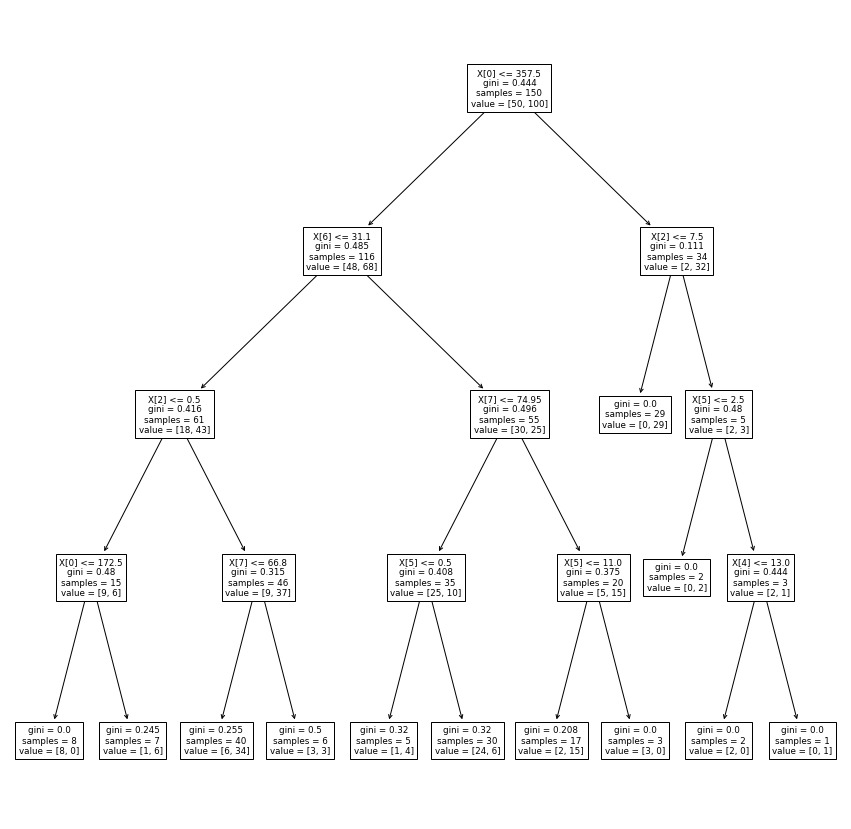

In [1532]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

plt.figure(figsize=(15,15))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train,y_train)
tree.plot_tree(clf) 
clf.score(X_test,y_test)

In [1624]:
X_train.columns[4]
res = data[(X.iloc[:,0]<=357.5)&(X.iloc[:,6]<=31.1)&(X.iloc[:,2]<=0.5)&(X.iloc[:,0]<=172.5)].drop(columns=[2019,2020])
res.columns = ['gentrified?','elevation','buyouts in 2015','buyouts in 2016','buyouts in 2017','buyouts in 2018','coffee shops',
             "Bachelor's or higher in 2010","Bachelor's or higher in 2018"]
res

,gentrified?,elevation,buyouts in 2015,buyouts in 2016,buyouts in 2017,buyouts in 2018,coffee shops,Bachelor's or higher in 2010,Bachelor's or higher in 2018
117,0,170.0,0.0,0.0,2.0,0.0,11.0,15.5,46.7
118,0,160.0,0.0,0.0,0.0,0.0,11.0,0,29.6
122.01,0,150.0,0.0,0.0,2.0,11.0,6.0,9.8,45.0
122.02,0,150.0,0.0,0.0,1.0,15.0,0.0,12.3,35.2
123.01,0,100.0,0.0,0.0,31.0,0.0,7.0,16.2,21.2
124.01,0,85.0,1.0,0.0,3.0,1.0,11.0,5.5,30.4
125.02,0,70.0,0.0,0.0,0.0,0.0,1.0,7.2,14.6
176.01,0,50.0,12.0,0.0,11.0,2.0,6.0,17.7,43.2
180,0,20.0,0.0,0.0,3.0,1.0,7.0,10.7,60.5
264.04,0,160.0,0.0,0.0,0.0,2.0,2.0,7,17.3


In [1606]:
import graphviz 
import pydotplus

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X.columns, 
                                class_names=['non-gentrified','gentrified'],
                                filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)

plt.savefig('decision tree.png')

<Figure size 432x288 with 0 Axes>

In [1464]:
diff = pca['2018']-pca['2010']
data = data.merge(diff.rename('new'),left_index=True,right_index=True)

## PCA gentrificaiton map

In [1368]:
sf = pd.read_csv('sf median income per census tract.csv')
sf['name'] = clean_name(sf.NAME)
sf = sf.set_index('name')

pca_map = pca.merge(sf['geometry'],left_index=True,right_index=True)
pca_map['diff']=pca_map['2018']-pca_map['2010']
pca_map.to_csv('pca_map.csv')

In [1369]:
def modify(x):
    if x <0:
        return 0
    else: 
        return x/100000

pca_map['modified_diff'] = pca_map['diff'].apply(modify)*2
pca_map.to_csv('modified_pca_map.csv')

In [1370]:
np.var(pca_map['modified_diff']*2)

5.405017521155909e-07

Text(0, 0.5, 'Gentrification (change in Index)')

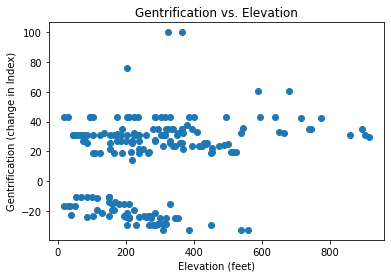

In [1038]:
plt.scatter(X['elevation'],pca_map['diff'])
plt.title('Gentrification vs. Elevation')
plt.xlabel('Elevation (feet)')
plt.ylabel('Gentrification (change in Index)')

## Housing Prices

In [756]:
housing = pd.read_csv('census_tract_housing_prices')
housing['name']=clean_name(housing.NAME)
housing = housing.set_index('name')
housing = housing.iloc[:,4:]
pct_diff = (housing['12/31/18']-housing['12/31/10'])/housing['12/31/10']*100
housing['percent change (2010-2018)'] = pct_diff
housing.merge(sf['geometry'],left_index=True,right_index=True).to_csv('housing prices 2010-2018.csv')

In [757]:
pct_diff

name
102     64.919850
103     64.919850
109     64.919850
110     64.919850
112     66.062455
          ...    
305     90.600602
307     88.661611
309    129.115571
308    129.115571
607     74.740591
Length: 190, dtype: float64